In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df=pd.read_csv('//Users//roshansiva//Downloads//cardio_train.csv',sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

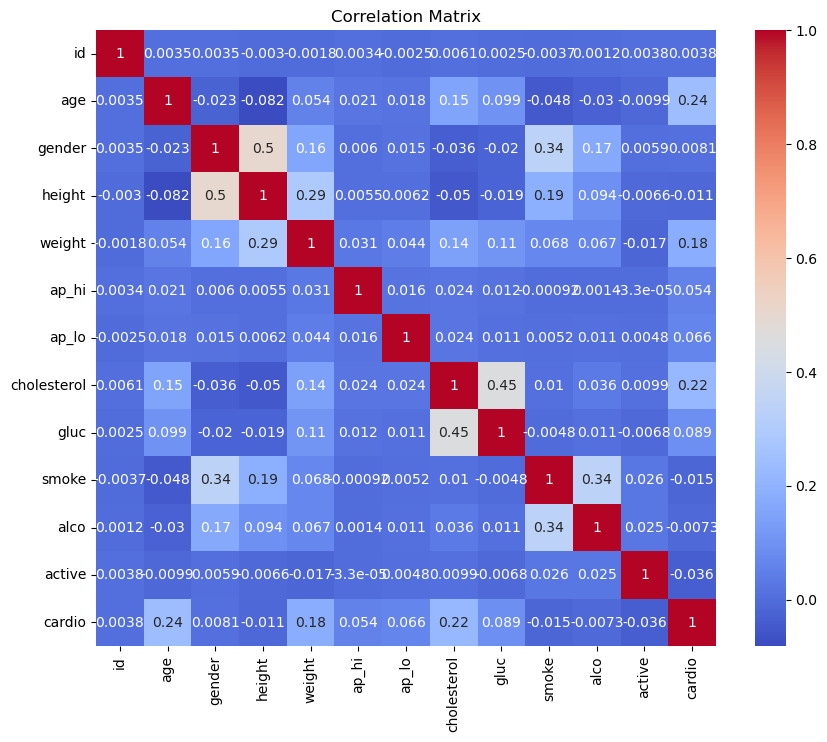

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


<Axes: xlabel='cholesterol', ylabel='cardio'>

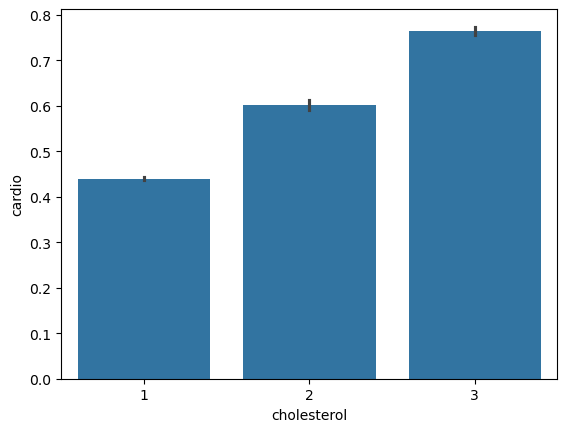

In [6]:
sns.barplot(x='cholesterol',y='cardio',data=df)

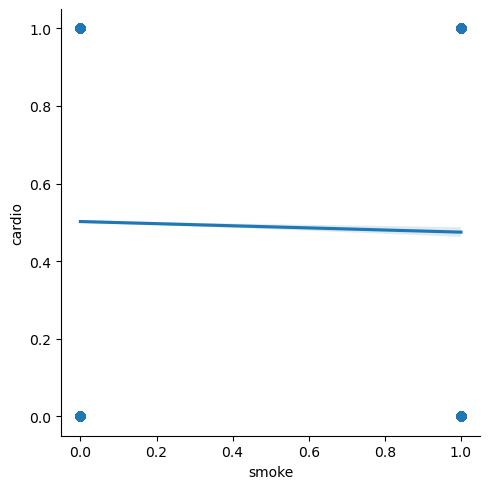

In [7]:
sns.lmplot(x='smoke',y='cardio',data=df)

<Axes: xlabel='alco', ylabel='cardio'>

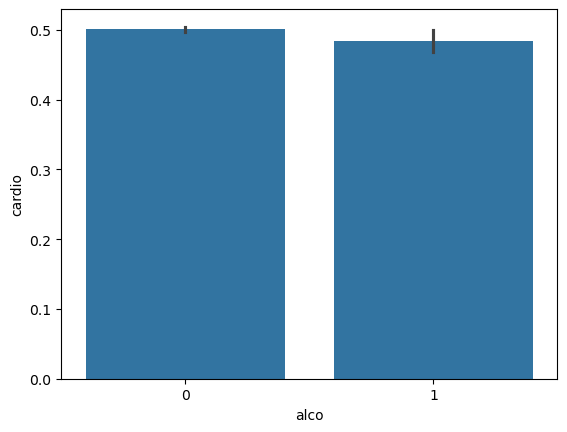

In [8]:
sns.barplot(x='alco',y='cardio',data=df)

In [30]:
X=df.iloc[:,1:12]
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [29]:
X['age_years'] = df['age'] / 365.25
X['age_years']

/var/folders/cd/cpd_frrx6hdb324cn7c9134m0000gn/T/ipykernel_13292/1153157627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age_years'] = df['age'] / 365.25


0        50.357290
1        55.381246
2        51.627652
3        48.249144
4        47.841205
           ...    
69995    52.676249
69996    61.878166
69997    52.199863
69998    61.412731
69999    56.235455
Name: age_years, Length: 68781, dtype: float64

In [11]:
x['age_years']=x['age_years'].round()
x['age_years']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age_years, Length: 70000, dtype: float64

In [27]:
df_clean = df[(df['ap_hi'] <= 250) & (df['ap_hi'] >= 50) & (df['ap_lo'] <= 200) & (df['ap_lo'] >= 30)]
X = df_clean.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
y = df_clean.iloc[:, 12]

In [28]:
y=df.iloc[:,12:]
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
47339,21876,1,154,80.0,130,90,2,1,0,0,1
67456,16717,2,162,70.0,140,90,1,1,0,0,0
12308,21128,2,174,92.0,150,100,1,1,0,0,1
32557,23366,2,173,76.0,120,82,1,1,0,0,1
664,20281,1,160,60.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37194,16001,2,170,75.0,150,80,1,1,1,0,1
6265,23209,2,162,73.0,160,90,1,1,0,0,1
54886,23589,1,169,74.0,120,80,1,1,0,0,1
860,18227,1,167,70.0,120,80,1,1,0,0,0


In [33]:
y_train

,cardio
47339,1
67456,1
12308,1
32557,1
664,0
...,...
37194,1
6265,1
54886,0
860,0


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [37]:
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [39]:
#By Logistic Regression
logi_model=LogisticRegression()
logi_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [40]:
ans=logi_model.predict(X_test)
ans

array([0, 0, 0, ..., 1, 0, 1])

In [41]:
accuracy_score=logi_model.score(X_test,y_test)
accuracy_score

0.7215

In [33]:
print(f'Logistic Regression Accuracy: {accuracy_score:.2f}')

Logistic Regression Accuracy: 0.72


In [42]:
precision_score=logi_model.score(X_test,y_test)
precision_score

0.7215

In [34]:
print(f'Logistic Regression Precision: {precision_score:.2f}')

Logistic Regression Precision: 0.72


In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ans)
cm

array([[5452, 1617],
       [2285, 4646]])

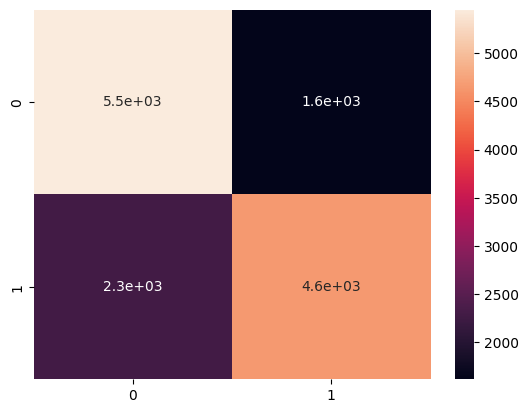

In [96]:
sns.heatmap(cm,annot=True)
plt.show()

In [43]:
#By KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [44]:
ans=knn.predict(X_test)
ans

array([0, 0, 0, ..., 1, 0, 1])

In [45]:
accuracy_score=knn.score(X_test,y_test)
accuracy_score

0.6483571428571429

In [45]:
print(f'KNeighborsClassifier accuracy: {accuracy_score:.2f}')

KNeighborsClassifier accuracy: 0.65


In [46]:
precision_score=knn.score(X_test,y_test)
precision_score

0.6483571428571429

In [44]:
print(f'KNeighborsClassifier precision: {precision_score:.2f}')

KNeighborsClassifier precision: 0.65


In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ans)
cm

array([[4497, 2572],
       [2572, 4359]])

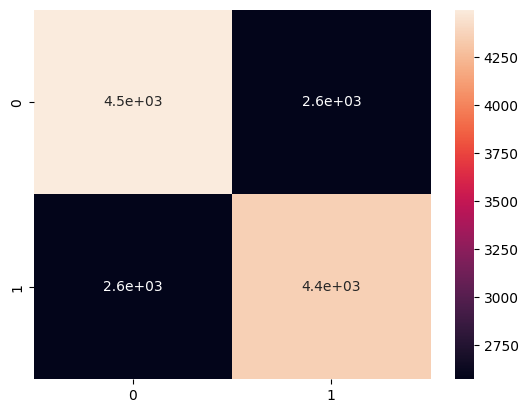

In [41]:
sns.heatmap(cm,annot=True)
plt.show()

In [47]:
#By Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
ans=dtc.predict(X_test)
ans

array([0, 0, 0, ..., 1, 0, 1])

In [49]:
accuracy_score=dtc.score(X_test,y_test)
accuracy_score

0.6310714285714286

In [51]:
print(f'Decision Tree Classifier accuracy: {accuracy_score:.2f}')

Decision Tree Classifier accuracy: 0.63


In [50]:
precision_score=dtc.score(X_test,y_test)
precision_score

0.6310714285714286

In [53]:
print(f'Decision Tree Classifier precision: {precision_score:.2f}')

Decision Tree Classifier precision: 0.63


In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ans)
cm

array([[4497, 2572],
       [2572, 4359]])

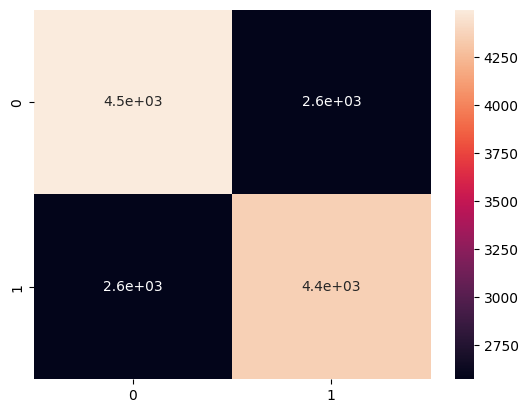

In [45]:
sns.heatmap(cm,annot=True)
plt.show()

In [51]:
#By Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [52]:
ans=rfc.predict(X_test)
ans

array([0, 0, 0, ..., 1, 0, 1])

In [53]:
accuracy_score=rfc.score(X_test,y_test)
accuracy_score

0.7109285714285715

In [57]:
print(f'Random Forest Classifier accuracy: {accuracy_score:.2f}')

Random Forest Classifier accuracy: 0.71


In [54]:
precision_score=rfc.score(X_test,y_test)
precision_score

0.7109285714285715

In [60]:
print(f'Random forest classifier precision: {precision_score:.2f}')

Random forest classifier precision: 0.71


In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ans)
cm

array([[5186, 1883],
       [2118, 4813]])

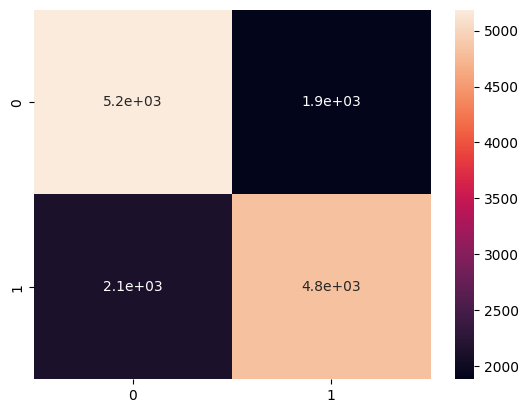

In [51]:
sns.heatmap(cm,annot=True)
plt.show()

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [60]:
models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [61]:
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracy_results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM Accuracy: 0.7291
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      7069
           1       0.74      0.69      0.72      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



/opt/anaconda3/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



KNN Accuracy: 0.6484
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      7069
           1       0.65      0.62      0.64      6931

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000


Decision Tree Accuracy: 0.6319
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      7069
           1       0.63      0.63      0.63      6931

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000


Logistic Regression Accuracy: 0.7215
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      7069
           1       0.74      0.67      0.70      6931

    accuracy                           0.72     14000
   macro avg       0.72      0.72   

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Accuracy: 0.7130
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      7069
           1       0.72      0.69      0.70      6931

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



In [62]:
best_model_name = max(accuracy_results, key=accuracy_results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy {accuracy_results[best_model_name]:.4f}")

# Example prediction
sample = X_test[0].reshape(1, -1)
prediction = best_model.predict(sample)
print(f"Sample Prediction: {'Disease' if prediction[0] == 1 else 'No Disease'}")


Best Model: SVM with Accuracy 0.7291
Sample Prediction: No Disease
